In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

In [4]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]
Y_test = Y_test.reshape(-1,)

In [5]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

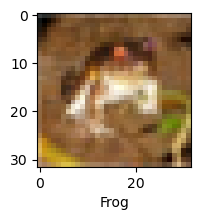

In [6]:
plot_sample(X_train, Y_train, 0)

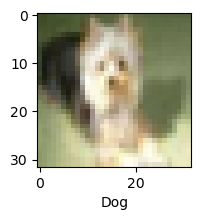

In [7]:
plot_sample(X_train, Y_train, 182)

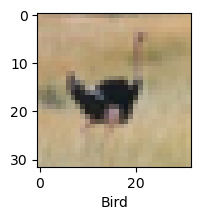

In [8]:
plot_sample(X_train, Y_train, 8321)

In [9]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
### Step 3 ###
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)

/Users/abdelilahnossair/miniforge3/envs/tensorflow/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-23 18:07:40.157856: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-23 18:07:40.158029: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-23 18:07:40.158335: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-23 18:07:40.158957: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-23 18:07:40.159786: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow devi

Epoch 1/10


2024-04-23 18:07:44.952144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 62ms/step - accuracy: 0.3351 - loss: 1.8172 - val_accuracy: 0.5611 - val_loss: 1.2313
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.5634 - loss: 1.2207 - val_accuracy: 0.6397 - val_loss: 1.0281
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.6376 - loss: 1.0370 - val_accuracy: 0.6636 - val_loss: 0.9565
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.6721 - loss: 0.9187 - val_accuracy: 0.6813 - val_loss: 0.9087
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.7083 - loss: 0.8349 - val_accuracy: 0.6946 - val_loss: 0.8640
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.7326 - loss: 0.7576 - val_accuracy: 0.7078 - val_loss: 0.8543
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.7521 - loss: 0.6982 - val_accuracy: 0.7186 - val_loss: 0.8315
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.7758 - loss: 0.6374 - val_accurac

In [11]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7195 - loss: 0.8265


[0.836685836315155, 0.72079998254776]

In [12]:
### Step 4 ###
def train_model(num_filters):
    model = Sequential([
        Conv2D(num_filters, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(num_filters*2, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)
    return max(history.history['val_accuracy'])

filter_counts = [16, 32, 64, 128]
accuracies = [train_model(f) for f in filter_counts]

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.3507 - loss: 1.7646 - val_accuracy: 0.5505 - val_loss: 1.2831
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.5549 - loss: 1.2501 - val_accuracy: 0.5676 - val_loss: 1.2048
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6148 - loss: 1.0881 - val_accuracy: 0.6412 - val_loss: 1.0276
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.6570 - loss: 0.9726 - val_accuracy: 0.6617 - val_loss: 0.9505
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6843 - loss: 0.8957 - val_accuracy: 0.6808 - val_loss: 0.9040
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7114 - loss: 0.8213 - val_accuracy: 0.6866 - val_loss: 0.8928
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7274 - loss: 0.7713 - val_accuracy: 0.6945 - val_loss: 0.8755
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.7486 - loss: 0.7052 - 

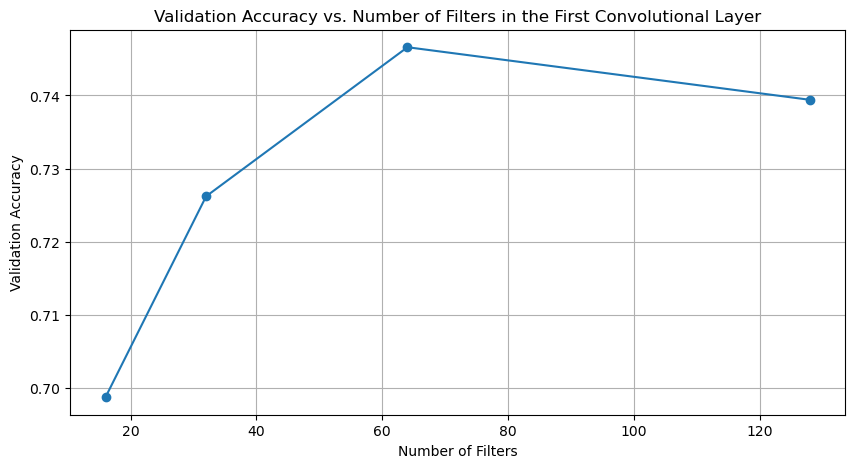

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(filter_counts, accuracies, marker='o')
plt.title('Validation Accuracy vs. Number of Filters in the First Convolutional Layer')
plt.xlabel('Number of Filters')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [15]:
def train_model(num_layers, base_filters=64):
    model = Sequential()
    # Start with the input and initial convolutional layer
    model.add(Conv2D(base_filters, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(MaxPooling2D(2, 2))
    
    # Add additional layers based on num_layers
    current_filters = base_filters
    for i in range(1, num_layers):
        current_filters *= 2  # Double the number of filters for each subsequent layer
        model.add(Conv2D(current_filters, (3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D(2, 2))
    
    # Add the final parts of the model
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)
    return max(history.history['val_accuracy'])

# Test the model with varying layer counts
layer_counts = [1, 2, 3, 4, 5]  # Different numbers of convolutional layers to test
accuracies = [train_model(n) for n in layer_counts]


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 96ms/step - accuracy: 0.2999 - loss: 2.0413 - val_accuracy: 0.5362 - val_loss: 1.3228
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.5126 - loss: 1.3532 - val_accuracy: 0.5924 - val_loss: 1.1863
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.5669 - loss: 1.2209 - val_accuracy: 0.6119 - val_loss: 1.1181
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.6015 - loss: 1.1263 - val_accuracy: 0.6279 - val_loss: 1.0768
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.6335 - loss: 1.0325 - val_accuracy: 0.6365 - val_loss: 1.0293
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.6551 - loss: 0.9726 - val_accuracy: 0.6526 - val_loss: 0.9981
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.6772 - loss: 0.9024 - val_accuracy: 0.6482 - val_loss: 1.0134
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.6957 - loss: 0.8460 -

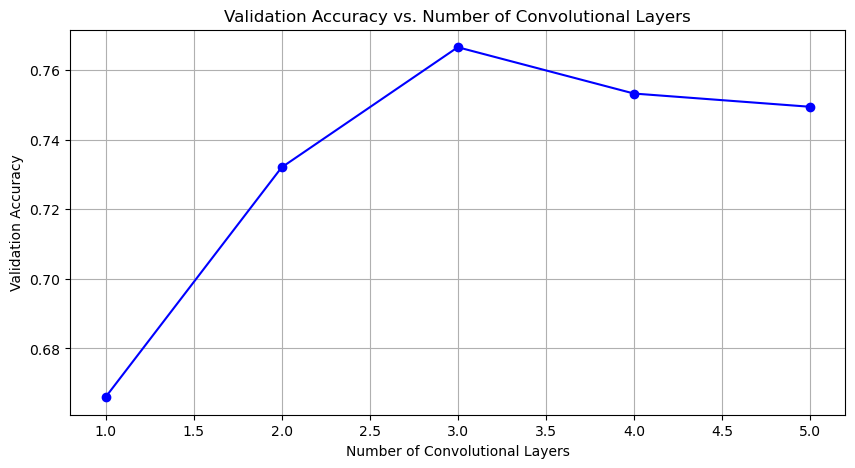

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(layer_counts, accuracies, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy vs. Number of Convolutional Layers')
plt.xlabel('Number of Convolutional Layers')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [17]:
def train_model(dropout_rate):
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)
    return max(history.history['val_accuracy'])

dropout_rates = [0.2, 0.3, 0.4, 0.5, 0.6]
accuracies = [train_model(d) for d in dropout_rates]

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.3733 - loss: 1.7092 - val_accuracy: 0.6200 - val_loss: 1.0783
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6408 - loss: 1.0202 - val_accuracy: 0.6624 - val_loss: 0.9586
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7172 - loss: 0.8130 - val_accuracy: 0.7288 - val_loss: 0.7783
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.7716 - loss: 0.6562 - val_accuracy: 0.7342 - val_loss: 0.7726
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.8155 - loss: 0.5331 - val_accuracy: 0.7362 - val_loss: 0.7780
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.8505 - loss: 0.4292 - val_accuracy: 0.7578 - val_loss: 0.7387
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8861 - loss: 0.3213 - val_accuracy: 0.7661 - val_loss: 0.7647
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9135 - loss: 0.2449 - 

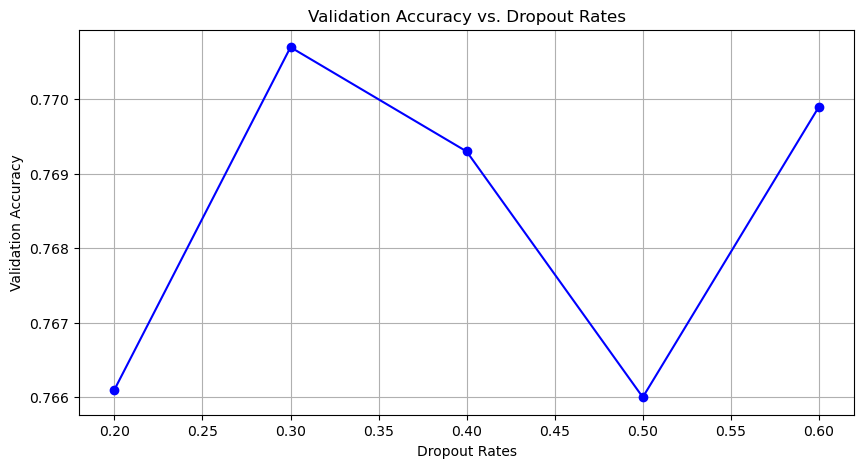

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(dropout_rates, accuracies, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy vs. Dropout Rates')
plt.xlabel('Dropout Rates')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [19]:
model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.3583 - loss: 1.7361 - val_accuracy: 0.5957 - val_loss: 1.1477
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6245 - loss: 1.0568 - val_accuracy: 0.6685 - val_loss: 0.9283
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7143 - loss: 0.8052 - val_accuracy: 0.7268 - val_loss: 0.7854
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7743 - loss: 0.6449 - val_accuracy: 0.7444 - val_loss: 0.7447
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8090 - loss: 0.5386 - val_accuracy: 0.7568 - val_loss: 0.7456
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8549 - loss: 0.4200 - val_accuracy: 0.7528 - val_loss: 0.7449
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8837 - loss: 0.3386 - val_accuracy: 0.7598 - val_loss: 0.7968
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9098 - loss: 0.2554 - 

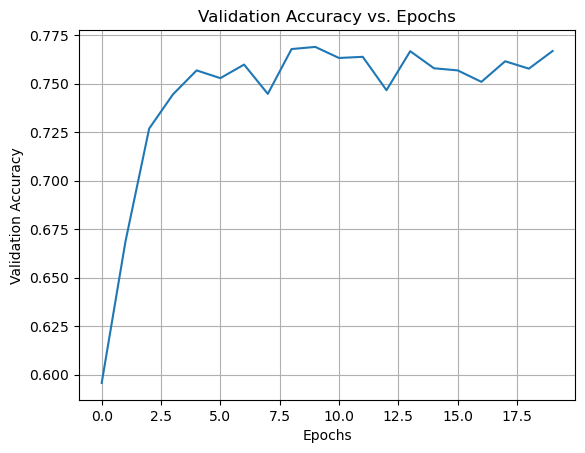

In [20]:
# Plotting the validation accuracy vs epochs
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [21]:
def train_model(btc_size):
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=9, batch_size=btc_size, validation_split=0.2)
    return max(history.history['val_accuracy'])

batch_sizes = [32, 64, 128]
accuracies = [train_model(b) for b in batch_sizes]

Epoch 1/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.3728 - loss: 1.7029 - val_accuracy: 0.6143 - val_loss: 1.0757
Epoch 2/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.6324 - loss: 1.0425 - val_accuracy: 0.6815 - val_loss: 0.9068
Epoch 3/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.7126 - loss: 0.8169 - val_accuracy: 0.7272 - val_loss: 0.7871
Epoch 4/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7643 - loss: 0.6650 - val_accuracy: 0.7421 - val_loss: 0.7609
Epoch 5/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.8078 - loss: 0.5463 - val_accuracy: 0.7406 - val_loss: 0.8127
Epoch 6/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.8468 - loss: 0.4387 - val_accuracy: 0.7509 - val_loss: 0.7947
Epoch 7/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.8699 - loss: 0.3628 - val_accuracy: 0.7548 - val_loss: 0.8083
Epoch 8/9
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.9034 - loss: 0

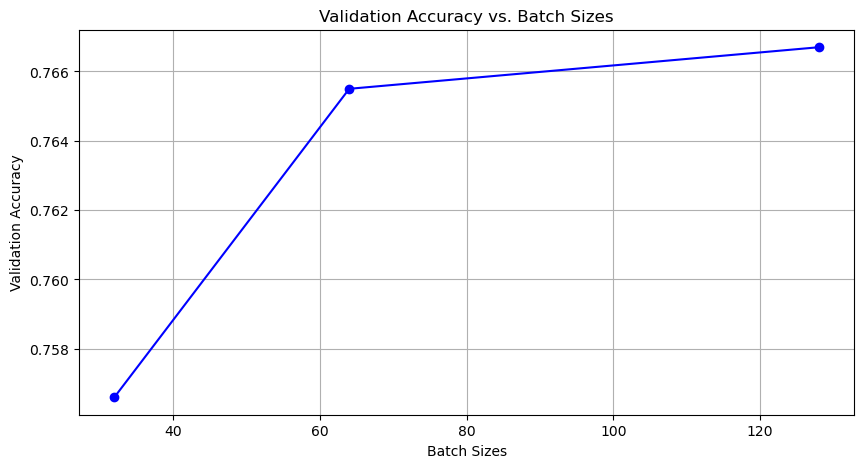

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(batch_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy vs. Batch Sizes')
plt.xlabel('Batch Sizes')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [23]:
def train_model(nbr_neurons):
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(nbr_neurons, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=9, batch_size=128, validation_split=0.2)
    return max(history.history['val_accuracy'])

number_neurons = [512, 1024, 2048, 4096]
accuracies = [train_model(n) for n in number_neurons]

Epoch 1/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 85ms/step - accuracy: 0.3140 - loss: 1.8490 - val_accuracy: 0.5554 - val_loss: 1.2471
Epoch 2/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.5733 - loss: 1.1880 - val_accuracy: 0.6475 - val_loss: 0.9976
Epoch 3/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6695 - loss: 0.9407 - val_accuracy: 0.7028 - val_loss: 0.8670
Epoch 4/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.7240 - loss: 0.7853 - val_accuracy: 0.7225 - val_loss: 0.7942
Epoch 5/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7642 - loss: 0.6761 - val_accuracy: 0.7370 - val_loss: 0.7854
Epoch 6/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8015 - loss: 0.5710 - val_accuracy: 0.7549 - val_loss: 0.7200
Epoch 7/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8298 - loss: 0.4911 - val_accuracy: 0.7465 - val_loss: 0.7374
Epoch 8/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8579 - loss: 0.4039 - val_accu

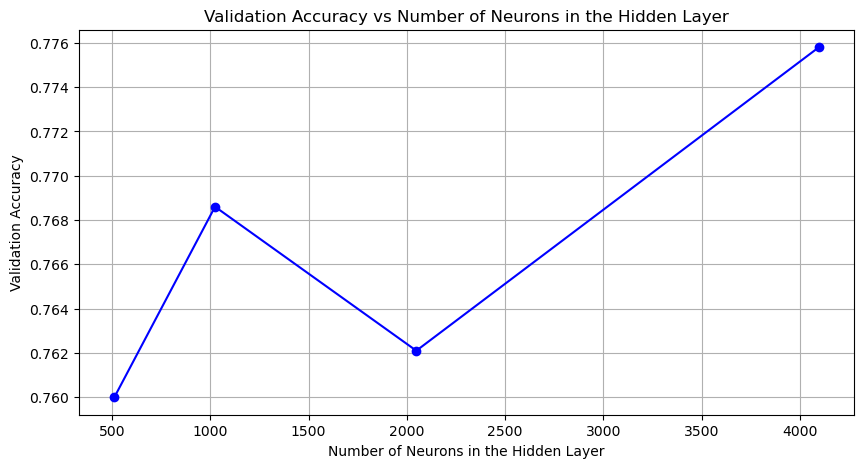

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(number_neurons, accuracies, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy vs Number of Neurons in the Hidden Layer')
plt.xlabel('Number of Neurons in the Hidden Layer')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [26]:
def train_model(num_layers):
    model = Sequential()
    # Start with the input and convolutional layers
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())

    # Add additional dense layers based on num_layers
    for i in range(1, num_layers):
        model.add(Dense(4096, activation='relu'))
    
    # Add the final parts of the model
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=9, batch_size=128, validation_split=0.2)
    return max(history.history['val_accuracy'])

layer_counts = [1, 2, 3]  # Different numbers of dense layers to test
accuracies = [train_model(n) for n in layer_counts]

Epoch 1/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 77ms/step - accuracy: 0.3260 - loss: 1.8459 - val_accuracy: 0.5311 - val_loss: 1.3070
Epoch 2/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.5630 - loss: 1.2323 - val_accuracy: 0.6253 - val_loss: 1.0792
Epoch 3/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.6433 - loss: 1.0187 - val_accuracy: 0.6461 - val_loss: 1.0159
Epoch 4/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.6874 - loss: 0.8998 - val_accuracy: 0.7061 - val_loss: 0.8581
Epoch 5/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7214 - loss: 0.8023 - val_accuracy: 0.7028 - val_loss: 0.8623
Epoch 6/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.7466 - loss: 0.7361 - val_accuracy: 0.7217 - val_loss: 0.8103
Epoch 7/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7728 - loss: 0.6684 - val_accuracy: 0.7425 - val_loss: 0.7574
Epoch 8/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7849 - loss: 0.6185 - val_accu

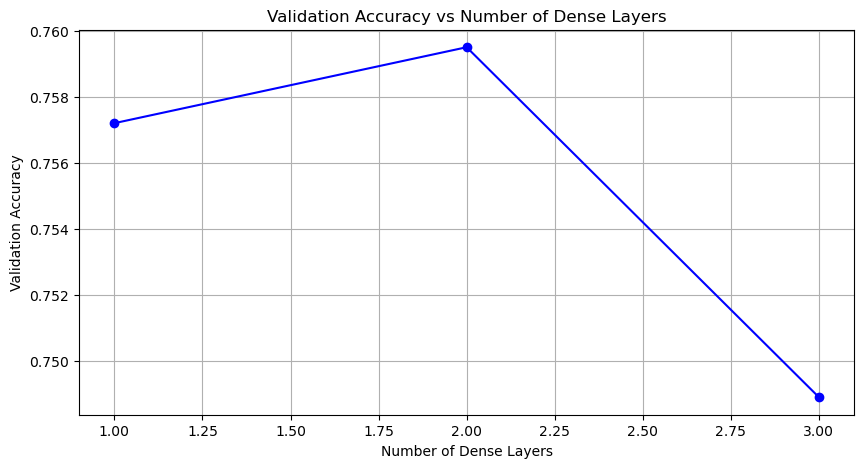

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(layer_counts, accuracies, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy vs Number of Dense Layers')
plt.xlabel('Number of Dense Layers')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

In [30]:
from tensorflow.keras.optimizers import Adam

def train_model(lr):
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=9, batch_size=128, validation_split=0.2)
    return max(history.history['val_accuracy'])

learning_rates = [0.01, 0.001, 0.0001]
accuracies = [train_model(l) for l in learning_rates]

Epoch 1/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 194ms/step - accuracy: 0.1246 - loss: 28.1657 - val_accuracy: 0.3158 - val_loss: 1.8517
Epoch 2/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 156ms/step - accuracy: 0.3166 - loss: 1.8492 - val_accuracy: 0.2415 - val_loss: 2.0637
Epoch 3/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 150ms/step - accuracy: 0.2913 - loss: 1.9099 - val_accuracy: 0.3690 - val_loss: 1.7134
Epoch 4/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.3651 - loss: 1.7295 - val_accuracy: 0.3658 - val_loss: 1.7321
Epoch 5/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 142ms/step - accuracy: 0.3907 - loss: 1.6744 - val_accuracy: 0.4000 - val_loss: 1.6771
Epoch 6/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.4029 - loss: 1.6549 - val_accuracy: 0.4162 - val_loss: 1.6358
Epoch 7/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - accuracy: 0.4135 - loss: 1.6352 - val_accuracy: 0.4154 - val_loss: 1.6124
Epoch 8/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.4171 - loss: 1.6126 -

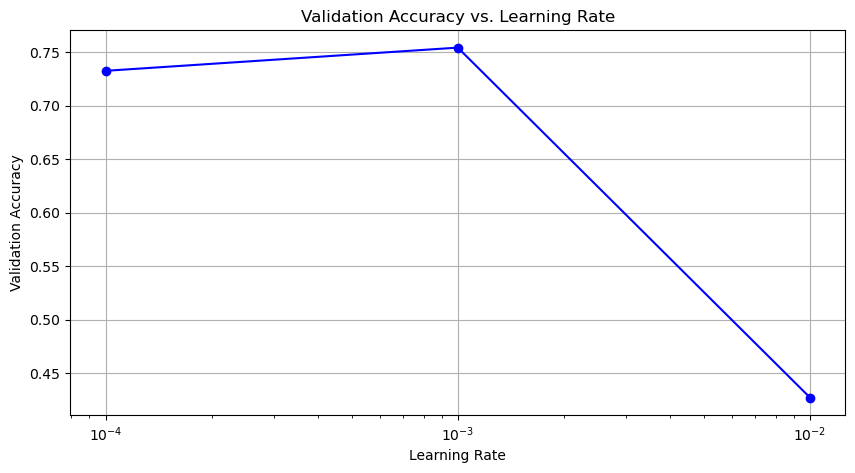

In [31]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.xscale('log')  # Use a log scale for better visibility
plt.grid(True)
plt.show()

In [32]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        BatchNormalization(),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=9, batch_size=128, validation_split=0.2)

Epoch 1/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 239ms/step - accuracy: 0.4404 - loss: 2.3926 - val_accuracy: 0.1003 - val_loss: 16.0507
Epoch 2/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 180ms/step - accuracy: 0.7008 - loss: 0.8402 - val_accuracy: 0.5619 - val_loss: 1.3844
Epoch 3/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step - accuracy: 0.7891 - loss: 0.5980 - val_accuracy: 0.7075 - val_loss: 0.8720
Epoch 4/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step - accuracy: 0.8523 - loss: 0.4222 - val_accuracy: 0.7129 - val_loss: 0.9814
Epoch 5/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 175ms/step - accuracy: 0.9036 - loss: 0.2773 - val_accuracy: 0.7283 - val_loss: 0.9566
Epoch 6/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 175ms/step - accuracy: 0.9328 - loss: 0.2029 - val_accuracy: 0.7412 - val_loss: 0.9478
Epoch 7/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 158ms/step - accuracy: 0.9481 - loss: 0.1581 - val_accuracy: 0.7165 - val_loss: 1.3389
Epoch 8/9
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 158ms/step - accuracy: 0.9552 - loss: 0.1316 

In [33]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.7412 - loss: 1.3589


[1.3696556091308594, 0.7384999990463257]

In [34]:
# Predictions for confusion matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
confusion_matrix = tf.math.confusion_matrix(Y_test, Y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step


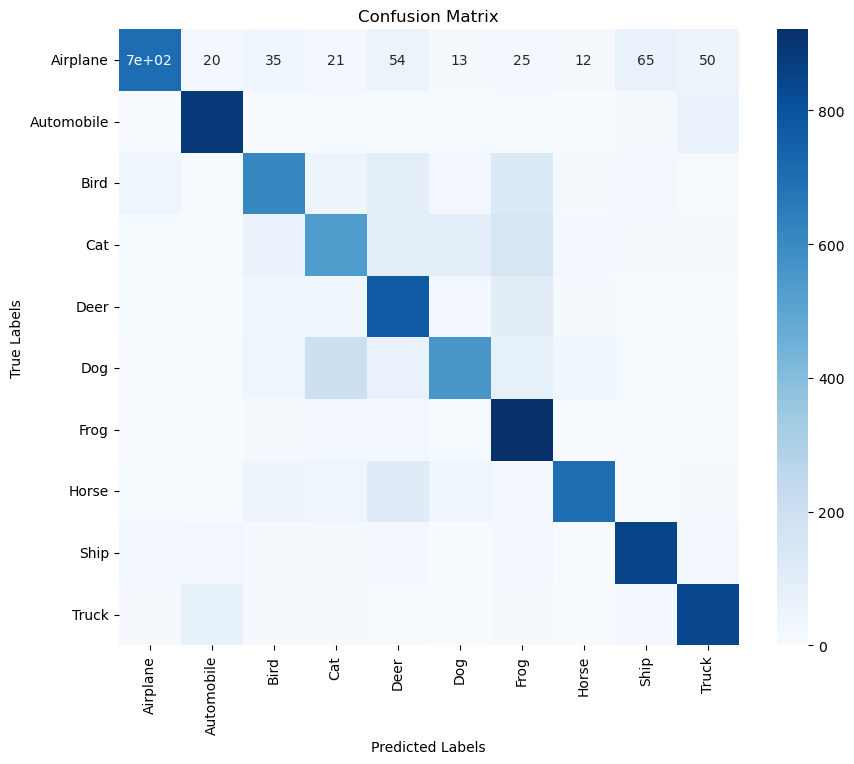

In [35]:
class_labels = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
### Step 5 ###

from tensorflow.keras.preprocessing.image import load_img, img_to_array

#Prepare the images to be accepted by the model (change resolution and normalize)
def prepare_images(image_paths): 
    images = [load_img(path, target_size=(32, 32)) for path in image_paths]
    images = np.array([img_to_array(img) for img in images])
    images = images.astype('float32') / 255.0 
    return images

# Images of our choice 
image_paths = [
    './Images_Inference/1.png', 
    './Images_Inference/3.png', 
    './Images_Inference/4.png', 
    './Images_Inference/6.png', 
    './Images_Inference/7.png', 
    './Images_Inference/2.png', 
    './Images_Inference/5.png', 
    './Images_Inference/8.png', 
    './Images_Inference/9.png', 
    './Images_Inference/10.png'
]

images = prepare_images(image_paths)

In [38]:
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


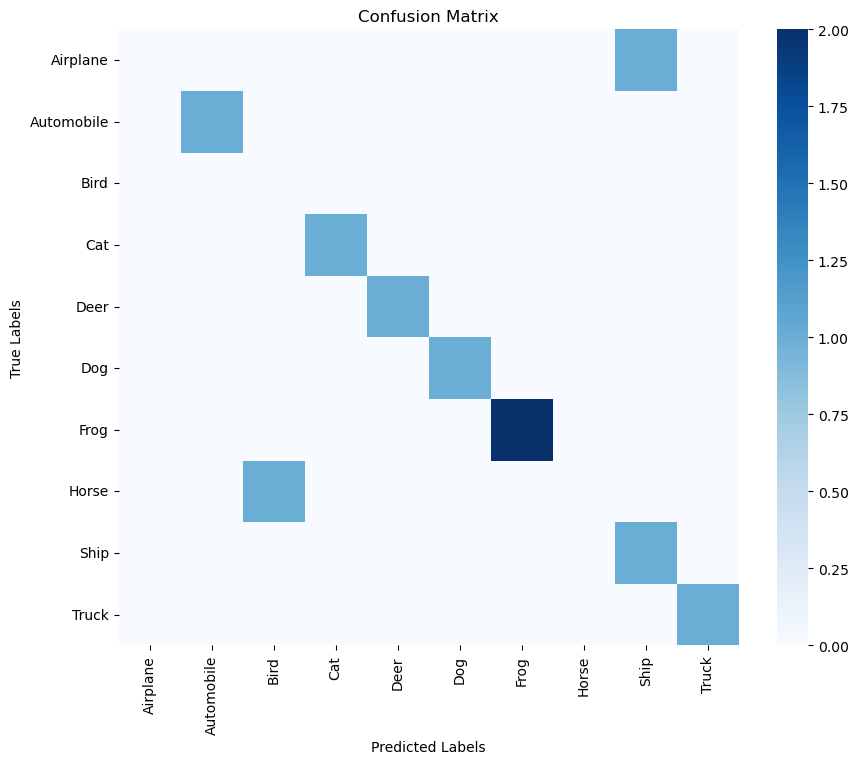

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


class_labels = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

true_labels = ["Frog", "Truck", "Deer", "Frog", "Cat", "Automobile", "Airplane", "Horse", "Ship", "Dog"]
true_label_indices = [class_labels.index(label) for label in true_labels]
conf_matrix = confusion_matrix(true_label_indices, predicted_classes)



# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()